<img src="datamecum_logo.png" align="right" style="float" width="400">
<font color="#CA3532"><h1 align="left">Programa técnico intensivo en data science. Datamecum.</h1></font>
<font color="#6E6E6E"><h2 align="left">Módulo Análisis Exploratorio de Datos.</h2></font> 
<font color="#6E6E6E"><h2 align="left">Boom demográfico</h2></font> 

#### Marcelino Martínez Sober, Regino Barranquero

In [1]:
# Dependencias necesarias para s
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt	
import seaborn as sns
import seaborn.objects as so
sns.__version__

'0.12.2'

## Ejercicio:

Se desea saber si hubo un aumento de la natalidad en los paises de Europa,('España','Francia','Alemania','Portugal','Italia') en torno a los años 1960-1970.   
Usa los datos 'Babies per woman' del repositorio de datos `gapminder`. Muestra los resultados mediante un gráfico de líneas para cada país.
Restringe la gráfica a los años comprendidos entre 1945-2000 

In [6]:
data.query("country in ['Spain','France','Italy','Germany','Portugal']").melt(id_vars=["country"],var_name='Year',value_name='Fertility').Year

0       1799
1       1799
2       1799
3       1799
4       1799
        ... 
1500    2100
1501    2100
1502    2100
1503    2100
1504    2100
Name: Year, Length: 1505, dtype: object

In [2]:

data = pd.read_csv('data/children_per_woman_total_fertility.csv')
display(data)
data2 = (data.query("country in ['Spain','France','Italy','Germany','Portugal']").melt(id_vars=["country"],var_name='Year',value_name='Fertility'))
# Una forma hay otras
data2 = data2.assign(YearNum = lambda x: [int(a) for a in x.Year])
data2

country  1799  1800  1801  1802  1803  1804  1805  1806  \
0                   Aruba  5.64  5.64  5.64  5.64  5.64  5.64  5.64  5.64   
1             Afghanistan  7.00  7.00  7.00  7.00  7.00  7.00  7.00  7.00   
2                  Angola  6.93  6.93  6.93  6.93  6.93  6.93  6.93  6.94   
3                 Albania  4.60  4.60  4.60  4.60  4.60  4.60  4.60  4.60   
4    Netherlands Antilles  5.80  5.80  5.80  5.80  5.80  5.80  5.80  5.80   
..                    ...   ...   ...   ...   ...   ...   ...   ...   ...   
197                 Samoa  6.98  6.98  6.98  6.98  6.98  6.98  6.98  6.98   
198                 Yemen  6.88  6.88  6.88  6.88  6.88  6.88  6.88  6.88   
199          South Africa  6.47  6.47  6.47  6.47  6.47  6.47  6.47  6.47   
200                Zambia  6.71  6.71  6.71  6.71  6.71  6.71  6.71  6.71   
201              Zimbabwe  6.75  6.75  6.75  6.75  6.75  6.75  6.75  6.75   

     1807  ...  2091  2092  2093  2094  2095  2096  2097  2098  2099  2100  
0    5.64  ...  1.82  1.82  1.82  1.82  1.82  1.82  1.82  1.82  1.83  1.83  
1    7.00  ...  1.74  1.74  1.74  1.74  1.74  1.74  1.74  1.74  1.74  1.74  
2    6.94  ...  2.54  2.52  2.50  2.48  2.47  2.45  2.43  2.42  2.40  2.40  
3    4.60  ...  1.78  1.78  1.78  1.79  1.79  1.79  1.79  1.79  1.79  1.79  
4    5.80  ...  2.00  2.00  2.01  2.01  2.01  2.01  2.01  2.02  2.02  2.02  
..    ...  ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  
197  6.98  ...  2.10  2.09  2.08  2.07  2.06  2.05  2.04  2.03  2.02  2.02  
198  6.88  ...  1.68  1.68  1.69  1.69  1.69  1.69  1.70  1.70  1.70  1.70  
199  6.47  ...  1.80  1.80  1.80  1.80  1.80  1.80  1.80  1.80  1.80  1.80  
200  6.71  ...  2.59  2.57  2.56  2.54  2.53  2.51  2.50  2.48  2.46  2.46  
201  6.75  ...  1.85  1.85  1.85  1.84  1.84  1.84  1.83  1.83  1.83  1.83  

[202 rows x 302 columns]

country  Year  Fertility  YearNum
0      Germany  1799       5.40     1799
1        Spain  1799       5.13     1799
2       France  1799       4.41     1799
3        Italy  1799       5.47     1799
4     Portugal  1799       4.50     1799
...        ...   ...        ...      ...
1500   Germany  2100       1.73     2100
1501     Spain  2100       1.73     2100
1502    France  2100       1.94     2100
1503     Italy  2100       1.79     2100
1504  Portugal  2100       1.76     2100

[1505 rows x 4 columns]

In [4]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1505 entries, 0 to 1504
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1505 non-null   object 
 1   Year       1505 non-null   object 
 2   Fertility  1505 non-null   float64
 3   YearNum    1505 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 47.2+ KB


In [7]:
# Varios ejemplos


data = pd.read_csv('data/children_per_woman_total_fertility.csv')
data2 =(
   data.query("country in ['Spain','France','Italy','Germany','Portugal']")
   .melt(id_vars=["country"],var_name='Year',value_name='Fertility')
# Podemos hacerlo en la cadena de operaciones o fuera
   .assign(Year1 = lambda x: x['Year'].astype(int)) 
# También así
   .assign(Year2 = lambda x: x.Year.astype(int)) 
)
# También lo podemos hacer fuera de la secuencia
data2['Year'] = data2['Year'].astype(int)
#
data2

country  Year  Fertility  Year1  Year2
0      Germany  1799       5.40   1799   1799
1        Spain  1799       5.13   1799   1799
2       France  1799       4.41   1799   1799
3        Italy  1799       5.47   1799   1799
4     Portugal  1799       4.50   1799   1799
...        ...   ...        ...    ...    ...
1500   Germany  2100       1.73   2100   2100
1501     Spain  2100       1.73   2100   2100
1502    France  2100       1.94   2100   2100
1503     Italy  2100       1.79   2100   2100
1504  Portugal  2100       1.76   2100   2100

[1505 rows x 5 columns]

In [8]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1505 entries, 0 to 1504
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1505 non-null   object 
 1   Year       1505 non-null   int32  
 2   Fertility  1505 non-null   float64
 3   Year1      1505 non-null   int32  
 4   Year2      1505 non-null   int32  
dtypes: float64(1), int32(3), object(1)
memory usage: 41.3+ KB


Continuamos añadiendo las condiciones

In [9]:
# Aplicamos las condiciones y vamos obteniendo un conjunto tidy
data = pd.read_csv('data/children_per_woman_total_fertility.csv')
data2 =(
   data.query("country in ['Spain','France','Italy','Germany','Portugal']")
   .melt(id_vars=["country"],var_name='Year',value_name='Fertility')
   #.assign(Year = lambda x : [int(a) for a in x.Year])
   .assign(Year = lambda x: x.Year.astype(int)) 
   .query('Year>=1945 and Year<=2000')
   #.reset_index()
)


data2

country  Year  Fertility
725    Germany  1945       1.53
726      Spain  1945       2.91
727     France  1945       2.31
728      Italy  1945       2.37
729   Portugal  1945       3.39
...        ...   ...        ...
1000   Germany  2000       1.35
1001     Spain  2000       1.23
1002    France  2000       1.82
1003     Italy  2000       1.25
1004  Portugal  2000       1.46

[280 rows x 3 columns]

Ahora usamos seaborn objets para representar

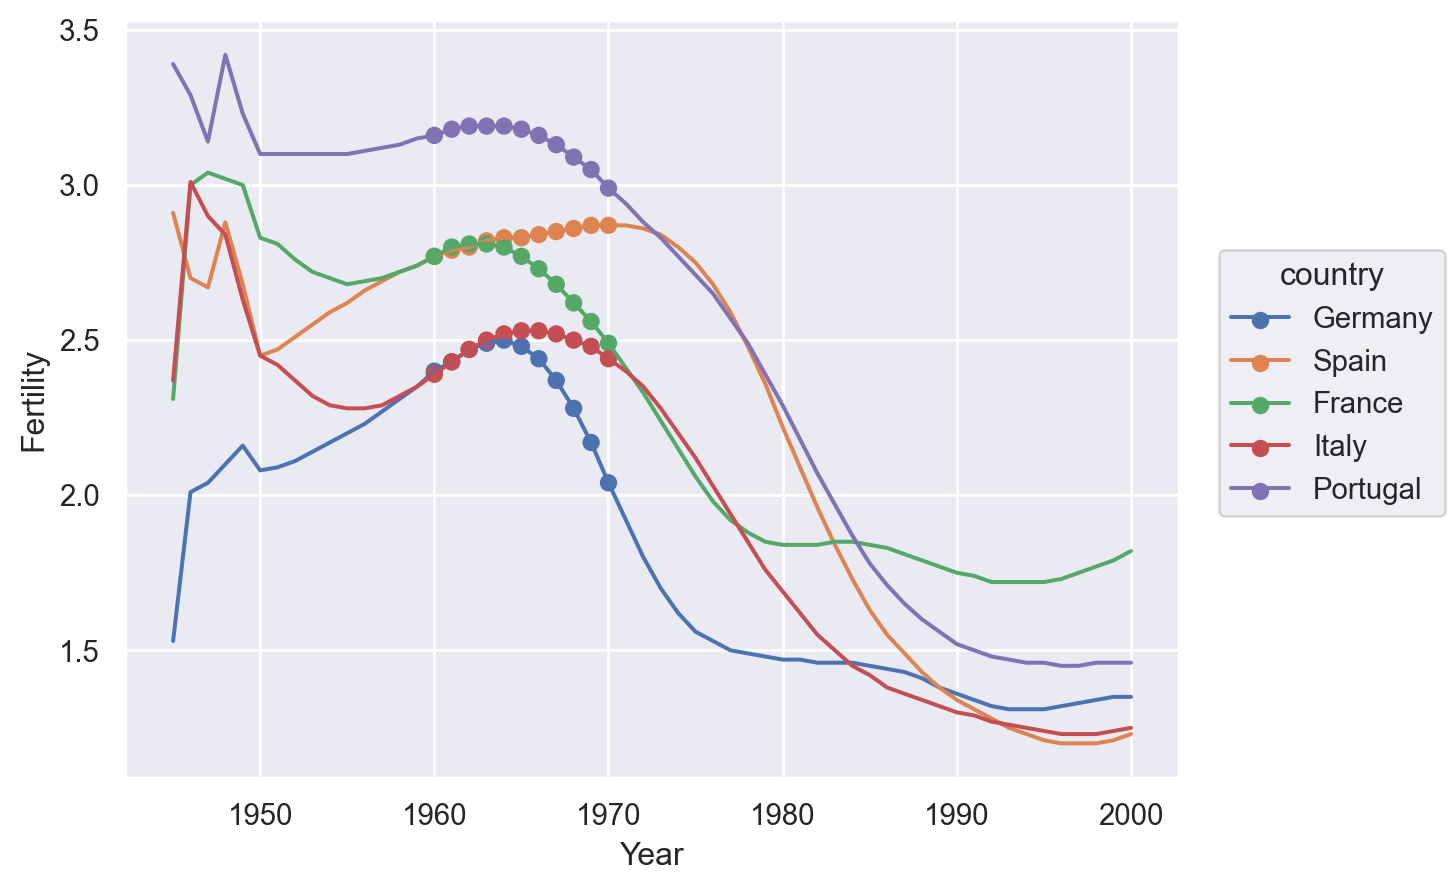

In [12]:
p =(so.Plot(data = data2, x='Year', y='Fertility', color='country')
    .add(so.Line())
    .add(data = data2.query('1960<=Year<=1970'), mark=so.Dot()))
p